# 뉴럴 네트워크
- iris 데이터셋

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
df = pd.read_csv('/content/drive/MyDrive/SKT FLY AI/2주차/ ML/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
df = df.drop('Id',axis =1)

In [42]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### 테스트 데이터준비

In [43]:
X = df.drop('Species',axis=1)
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [44]:
y = df.Species
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_train.shape,y_train.shape

((120, 4), (120,))

### 스케일링

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_train_s

array([[-1.47393679,  1.22037928, -1.5639872 , -1.30948358],
       [-0.13307079,  3.02001693, -1.27728011, -1.04292204],
       [ 1.08589829,  0.09560575,  0.38562104,  0.28988568],
       [-1.23014297,  0.77046987, -1.21993869, -1.30948358],
       [-1.7177306 ,  0.32056046, -1.39196294, -1.30948358],
       [ 0.59831066, -1.25412249,  0.72966956,  0.95628954],
       [ 0.72020757,  0.32056046,  0.44296246,  0.42316645],
       [-0.74255534,  0.99542457, -1.27728011, -1.30948358],
       [-0.98634915,  1.22037928, -1.33462153, -1.30948358],
       [-0.74255534,  2.34515281, -1.27728011, -1.44276436],
       [-0.01117388, -0.80421307,  0.78701097,  0.95628954],
       [ 0.23261993,  0.77046987,  0.44296246,  0.55644722],
       [ 1.08589829,  0.09560575,  0.5576453 ,  0.42316645],
       [-0.49876152,  1.8952434 , -1.39196294, -1.04292204],
       [-0.49876152,  1.44533399, -1.27728011, -1.30948358],
       [-0.37686461, -1.47907719, -0.01576889, -0.24323741],
       [ 0.59831066, -0.

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [50]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_train_o

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [51]:
X_train_s.shape

(120, 4)

### 4. 모델 만들기

In [52]:
from tensorflow import keras
from keras import layers

In [53]:
model = keras.Sequential([
    layers.Dense(units = 6,activation="relu",input_shape=(4,)),
    layers.Dense(units = 3,activation="relu"),
    layers.Dense(units = 3,activation='softmax') # 분류 클래스가 3개니까 3으로 설정하며, softmax로 멀티분류 진행
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 30        
                                                                 
 dense_13 (Dense)            (None, 3)                 21        
                                                                 
 dense_14 (Dense)            (None, 3)                 12        
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 5. 학습

In [54]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [55]:
EPOCHS = 120
BATCH_SIZE = 16

history = model.fit(
    X_train_s,y_train_o,
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split=0.2,
    verbose = 1  # log ¢
)

Epoch 1/120
6/6 [==============================] - 2s 80ms/step - loss: 0.9342 - accuracy: 0.3646 - val_loss: 1.1413 - val_accuracy: 0.2083
Epoch 2/120
6/6 [==============================] - 0s 14ms/step - loss: 0.9141 - accuracy: 0.3646 - val_loss: 1.1137 - val_accuracy: 0.2083
Epoch 3/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8947 - accuracy: 0.3854 - val_loss: 1.0887 - val_accuracy: 0.2083
Epoch 4/120
6/6 [==============================] - 0s 17ms/step - loss: 0.8763 - accuracy: 0.4271 - val_loss: 1.0665 - val_accuracy: 0.2083
Epoch 5/120
6/6 [==============================] - 0s 16ms/step - loss: 0.8602 - accuracy: 0.4375 - val_loss: 1.0450 - val_accuracy: 0.2083
Epoch 6/120
6/6 [==============================] - 0s 15ms/step - loss: 0.8434 - accuracy: 0.4583 - val_loss: 1.0254 - val_accuracy: 0.2500
Epoch 7/120
6/6 [==============================] - 0s 12ms/step - loss: 0.8274 - accuracy: 0.4896 - val_loss: 1.0075 - val_accuracy: 0.2917
Epoch 8/120
6/6 [===

### 평가

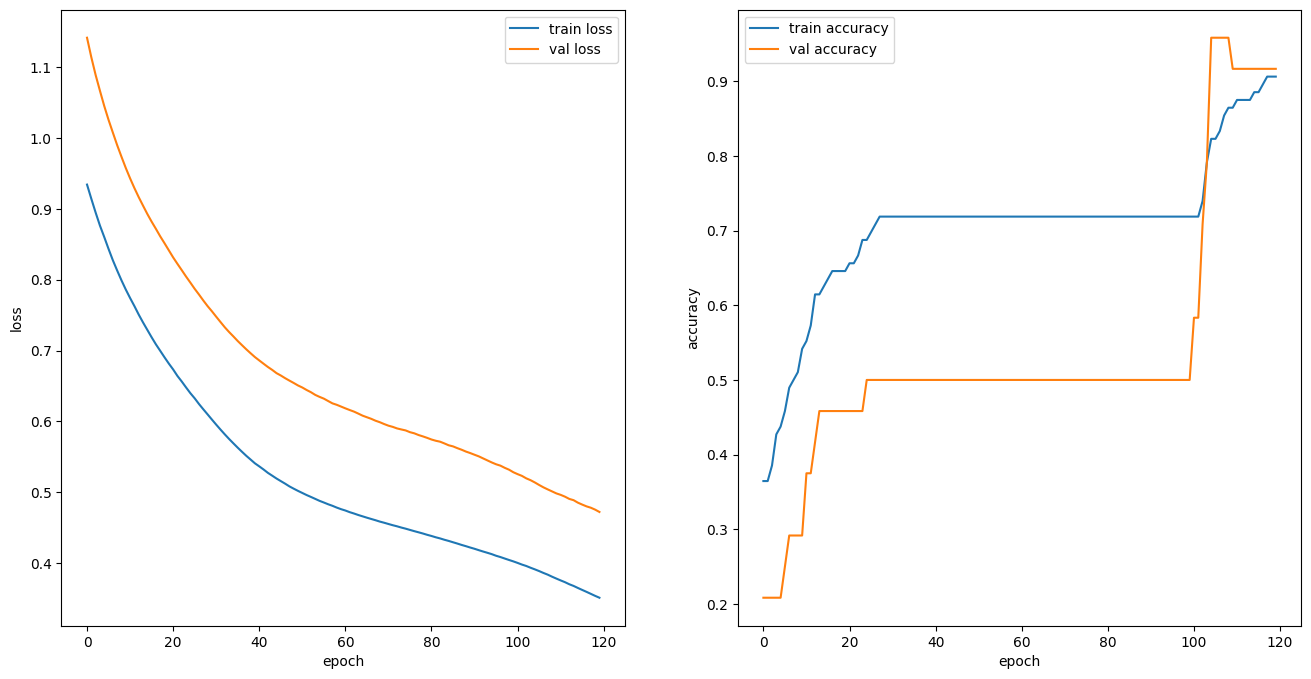

In [56]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1,2,1)
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.legend()
    plt.show()
plot_history(history)

In [63]:
X_test_s = scaler.transform(X_test)
y_test = le.transform(y_test)


In [64]:
y_pred = model.predict(X_test_s)
y_pred.shape

1/1 [==============================] - 0s 23ms/step


(30, 3)

In [65]:
y_test.shape

(30,)

In [72]:
y_pred = np.argmax(y_pred, axis=1)

In [67]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [73]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score

def print_metrics(y_test,y_pred):
  acc = accuracy_score(y_test,y_pred) # 정답값, 예측
  print(f'optimal_accuracy: {acc}')
  acc = recall_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'recall_score: {acc}')
  acc = precision_score(y_test,y_pred,average='macro') # 정답값, 예측
  print(f'precision_score: {acc}')
print_metrics(y_test,y_pred)

optimal_accuracy: 0.8666666666666667
recall_score: 0.8653198653198654
precision_score: 0.8653198653198654
